In [1]:
import pandas as pd

KNN

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [4]:
df.shape

(6991, 41)

# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
Actual_Results = df["koi_disposition"]
Feature_Set = df.drop("koi_disposition", axis=1)
#Feature_Set
Feature_Names = Feature_Set.columns
Feature_Names

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [6]:
#using Actual_Results as the y-values
#Actual_Results
X=Feature_Set
y=Actual_Results

In [7]:
# Search for top 10 features according to feature importances
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=250,learning_rate=1.0,max_depth=1,random_state=0)
model.fit(X,y)
model.feature_importances_

array([2.60688858e-01, 2.46980546e-01, 1.75985959e-01, 2.03134802e-02,
       2.32487160e-03, 4.59675115e-04, 1.85726096e-04, 5.00055556e-03,
       4.10157937e-04, 2.72422069e-04, 4.31920796e-03, 9.41308828e-04,
       2.38202743e-03, 8.88944750e-03, 3.83105489e-02, 2.31265322e-04,
       2.50125549e-03, 1.67951790e-03, 4.52128956e-04, 2.29894003e-02,
       9.63857808e-04, 5.42085677e-03, 1.26294956e-04, 2.86544032e-04,
       7.19421013e-04, 4.61592239e-04, 7.96938647e-02, 2.74682994e-03,
       9.71028723e-04, 9.81578136e-02, 1.08029809e-03, 8.15077613e-04,
       3.65355791e-04, 1.71499278e-03, 1.93201650e-03, 1.31314682e-03,
       9.42795086e-04, 2.23334203e-03, 1.79633572e-03, 2.94017676e-03])

In [8]:
# Store the top 10 features as a series, using the column headers as the index
feat_imp = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_imp

koi_fpflag_nt        0.260689
koi_fpflag_ss        0.246981
koi_fpflag_co        0.175986
koi_steff_err1       0.098158
koi_model_snr        0.079694
koi_duration_err1    0.038311
koi_prad             0.022989
koi_fpflag_ec        0.020313
koi_duration         0.008889
koi_prad_err2        0.005421
dtype: float64

In [9]:
# Set features based on feature importances
X = df[feat_imp.index]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range (5, 35, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train: {train_score:.3f}, Test: {test_score:.3f}")

k: 5, Train: 0.904, Test: 0.874
k: 8, Train: 0.892, Test: 0.875
k: 11, Train: 0.889, Test: 0.878
k: 14, Train: 0.887, Test: 0.879
k: 17, Train: 0.881, Test: 0.883
k: 20, Train: 0.882, Test: 0.880
k: 23, Train: 0.878, Test: 0.883
k: 26, Train: 0.878, Test: 0.884
k: 29, Train: 0.874, Test: 0.884
k: 32, Train: 0.876, Test: 0.883


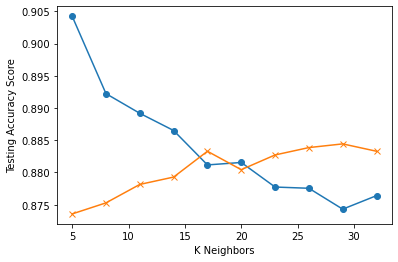

In [14]:
import matplotlib.pyplot as plt

# Plot training and testing scores
plt.plot(range(5, 35, 3), train_scores, marker='o')
plt.plot(range(5, 35, 3), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Current best k value looks like k=17

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [15]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# Initialize new classifer outside of loop
knn2 = KNeighborsClassifier()

# Create the GridSearchCV model
param_grid = dict(n_neighbors=list(range(5, 55)))

best_model = GridSearchCV(knn2, param_grid, cv=100, scoring='accuracy', verbose=1)

In [16]:
# Train the model with GridSearch
best_model.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


GridSearchCV(cv=100, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]},
             scoring='accuracy', verbose=1)

In [17]:
print(best_model.best_params_)
print(best_model.best_score_)

{'n_neighbors': 16}
0.8697568940493469


In [18]:
# Make predictions
grid_predictions = best_model.predict(X_test_scaled)
df_grid = pd.DataFrame({"Actual":y_test, "Predicted":grid_predictions})
df_grid.head()

,Actual,Predicted
1196,FALSE POSITIVE,FALSE POSITIVE
2638,CANDIDATE,CANDIDATE
1893,CANDIDATE,CONFIRMED
1902,FALSE POSITIVE,FALSE POSITIVE
1518,CONFIRMED,CONFIRMED


In [19]:
# Score the model
best_model.score(X_test_scaled, y_test)

0.8827231121281465

# Save the Model

In [20]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knnGradientBoost.sav'
joblib.dump(best_model, filename)

['knnGradientBoost.sav']

In [23]:
# Print Classification Report.
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.80      0.72      0.76       422
     CONFIRMED       0.76      0.82      0.79       450
FALSE POSITIVE       0.99      1.00      0.99       876

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.88      0.88      0.88      1748

